# Fetching Data

In [42]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sn

In [43]:
root_path = "WESAD"
zip_label = "_E4_Data.zip"
E4_label = "_E4_Data"

In [44]:
pacient_state = {
    0: "Not Defined/Transient",
    1: "Baseline",
    2: "Stress",
    3: "Amusement",
    4: "Meditation",
    5: "Error/Not Labeled",
    6: "Error/Not Labeled",
    7: "Error/Not Labeled"
}

In [45]:
chest_signal_available = ['ECG', 'EMG', 'EDA', 'Temp', 'Resp']

In [46]:
subjects_available = os.listdir(root_path)

In [47]:
def get_input_chest_data(subjects_list):
    
    chest_df_list = []
    
    for subject in subjects_list:
        
        pkl_path = os.path.join(root_path, subject, subject + ".pkl")
        f=open(pkl_path,'rb')
        data=pickle.load(f,encoding='latin1')
        
        index_df = [i for i in range(1, len(data["label"]) + 1)]

        # chest_data = {
        #     body_signal: data["signal"]["chest"][body_signal].reshape(len(data["signal"]["chest"][body_signal]),), 
        #     "subject": data["subject"],
        #     "label_id": data["label"],
        #     "label": [pacient_state[i]  for i in data["label"] ]
        # }

        chest_data = {
            body_signal: data["signal"]["chest"][body_signal].reshape(len(data["signal"]["chest"][body_signal]),)
            for body_signal in chest_signal_available
        }
        chest_data["subject"] = data["subject"]
        chest_data["label_id"] = data["label"]
        chest_data["label"] = [pacient_state[i]  for i in data["label"]]

        # chest_df_list.append(pd.DataFrame(chest_data, index = index_df)[::700])
        chest_df_list.append(pd.DataFrame(chest_data, index = index_df))
        
    return chest_df_list

In [48]:
input_chest_data = get_input_chest_data(subjects_available)

# Investigating Data

In [49]:
sample_df = input_chest_data[0]

sample_df

,ECG,EMG,EDA,Temp,Resp,subject,label_id,label
1,-1.333694,-0.013687,0.716019,33.695862,0.213623,S10,0,Not Defined/Transient
2,-1.327744,-0.021927,0.714493,33.741333,0.192261,S10,0,Not Defined/Transient
3,-1.322067,-0.009018,0.715637,33.717072,0.205994,S10,0,Not Defined/Transient
4,-1.316345,-0.002380,0.714874,33.741333,0.193787,S10,0,Not Defined/Transient
5,-1.310257,0.001053,0.715256,33.747406,0.172424,S10,0,Not Defined/Transient
...,...,...,...,...,...,...,...,...
3847196,0.522949,0.017029,1.720810,35.015808,-2.032471,S10,0,Not Defined/Transient
3847197,0.526932,0.002060,1.707077,35.018921,-2.030945,S10,0,Not Defined/Transient
3847198,0.530502,0.006546,1.704407,35.020447,-2.183533,S10,0,Not Defined/Transient
3847199,0.533752,-0.001419,1.748276,34.932495,-2.003479,S10,0,Not Defined/Transient


<AxesSubplot:>

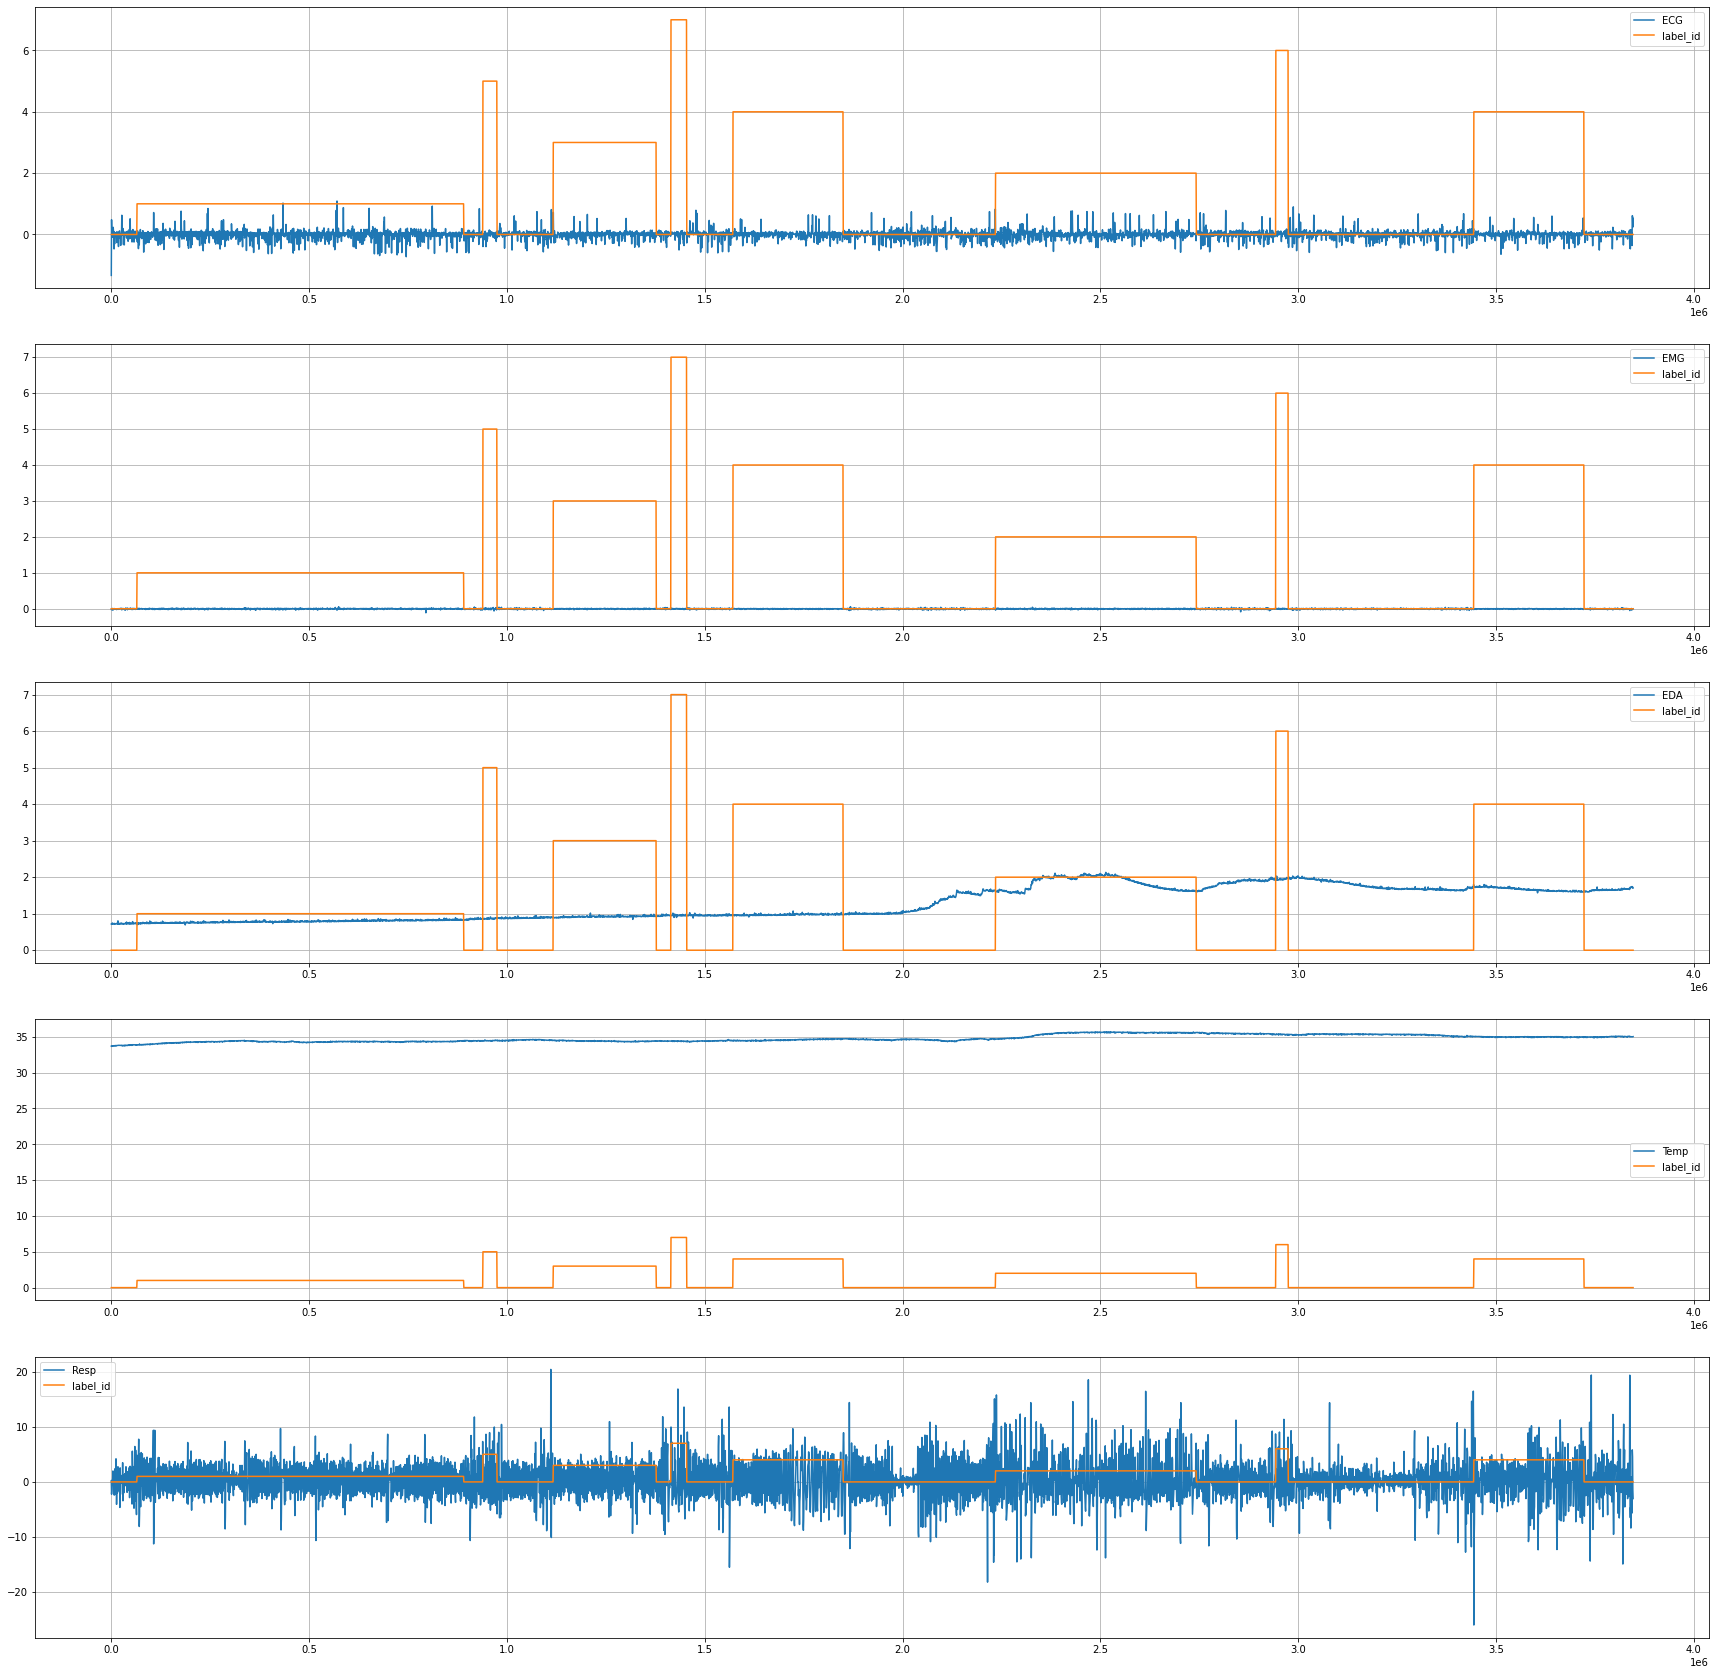

In [50]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)

sample_df[::700].plot(figsize=(30, 30), grid=True, y=["ECG", "label_id"], ax=ax1)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["EMG", "label_id"], ax=ax2)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["EDA", "label_id"], ax=ax3)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["Temp", "label_id"], ax=ax4)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["Resp", "label_id"], ax=ax5)

In [51]:
sample_corr_df  = sample_df.corr("pearson")

sample_corr_df

,ECG,EMG,EDA,Temp,Resp,label_id
ECG,1.000000,-0.159615,-0.000054,0.000009,0.012907,0.000192
EMG,-0.159615,1.000000,-0.010648,-0.011981,0.000159,-0.003744
EDA,-0.000054,-0.010648,1.000000,0.923337,-0.001085,-0.027200
Temp,0.000009,-0.011981,0.923337,1.000000,-0.000154,-0.026514
Resp,0.012907,0.000159,-0.001085,-0.000154,1.000000,-0.002492
label_id,0.000192,-0.003744,-0.027200,-0.026514,-0.002492,1.000000


<AxesSubplot:>

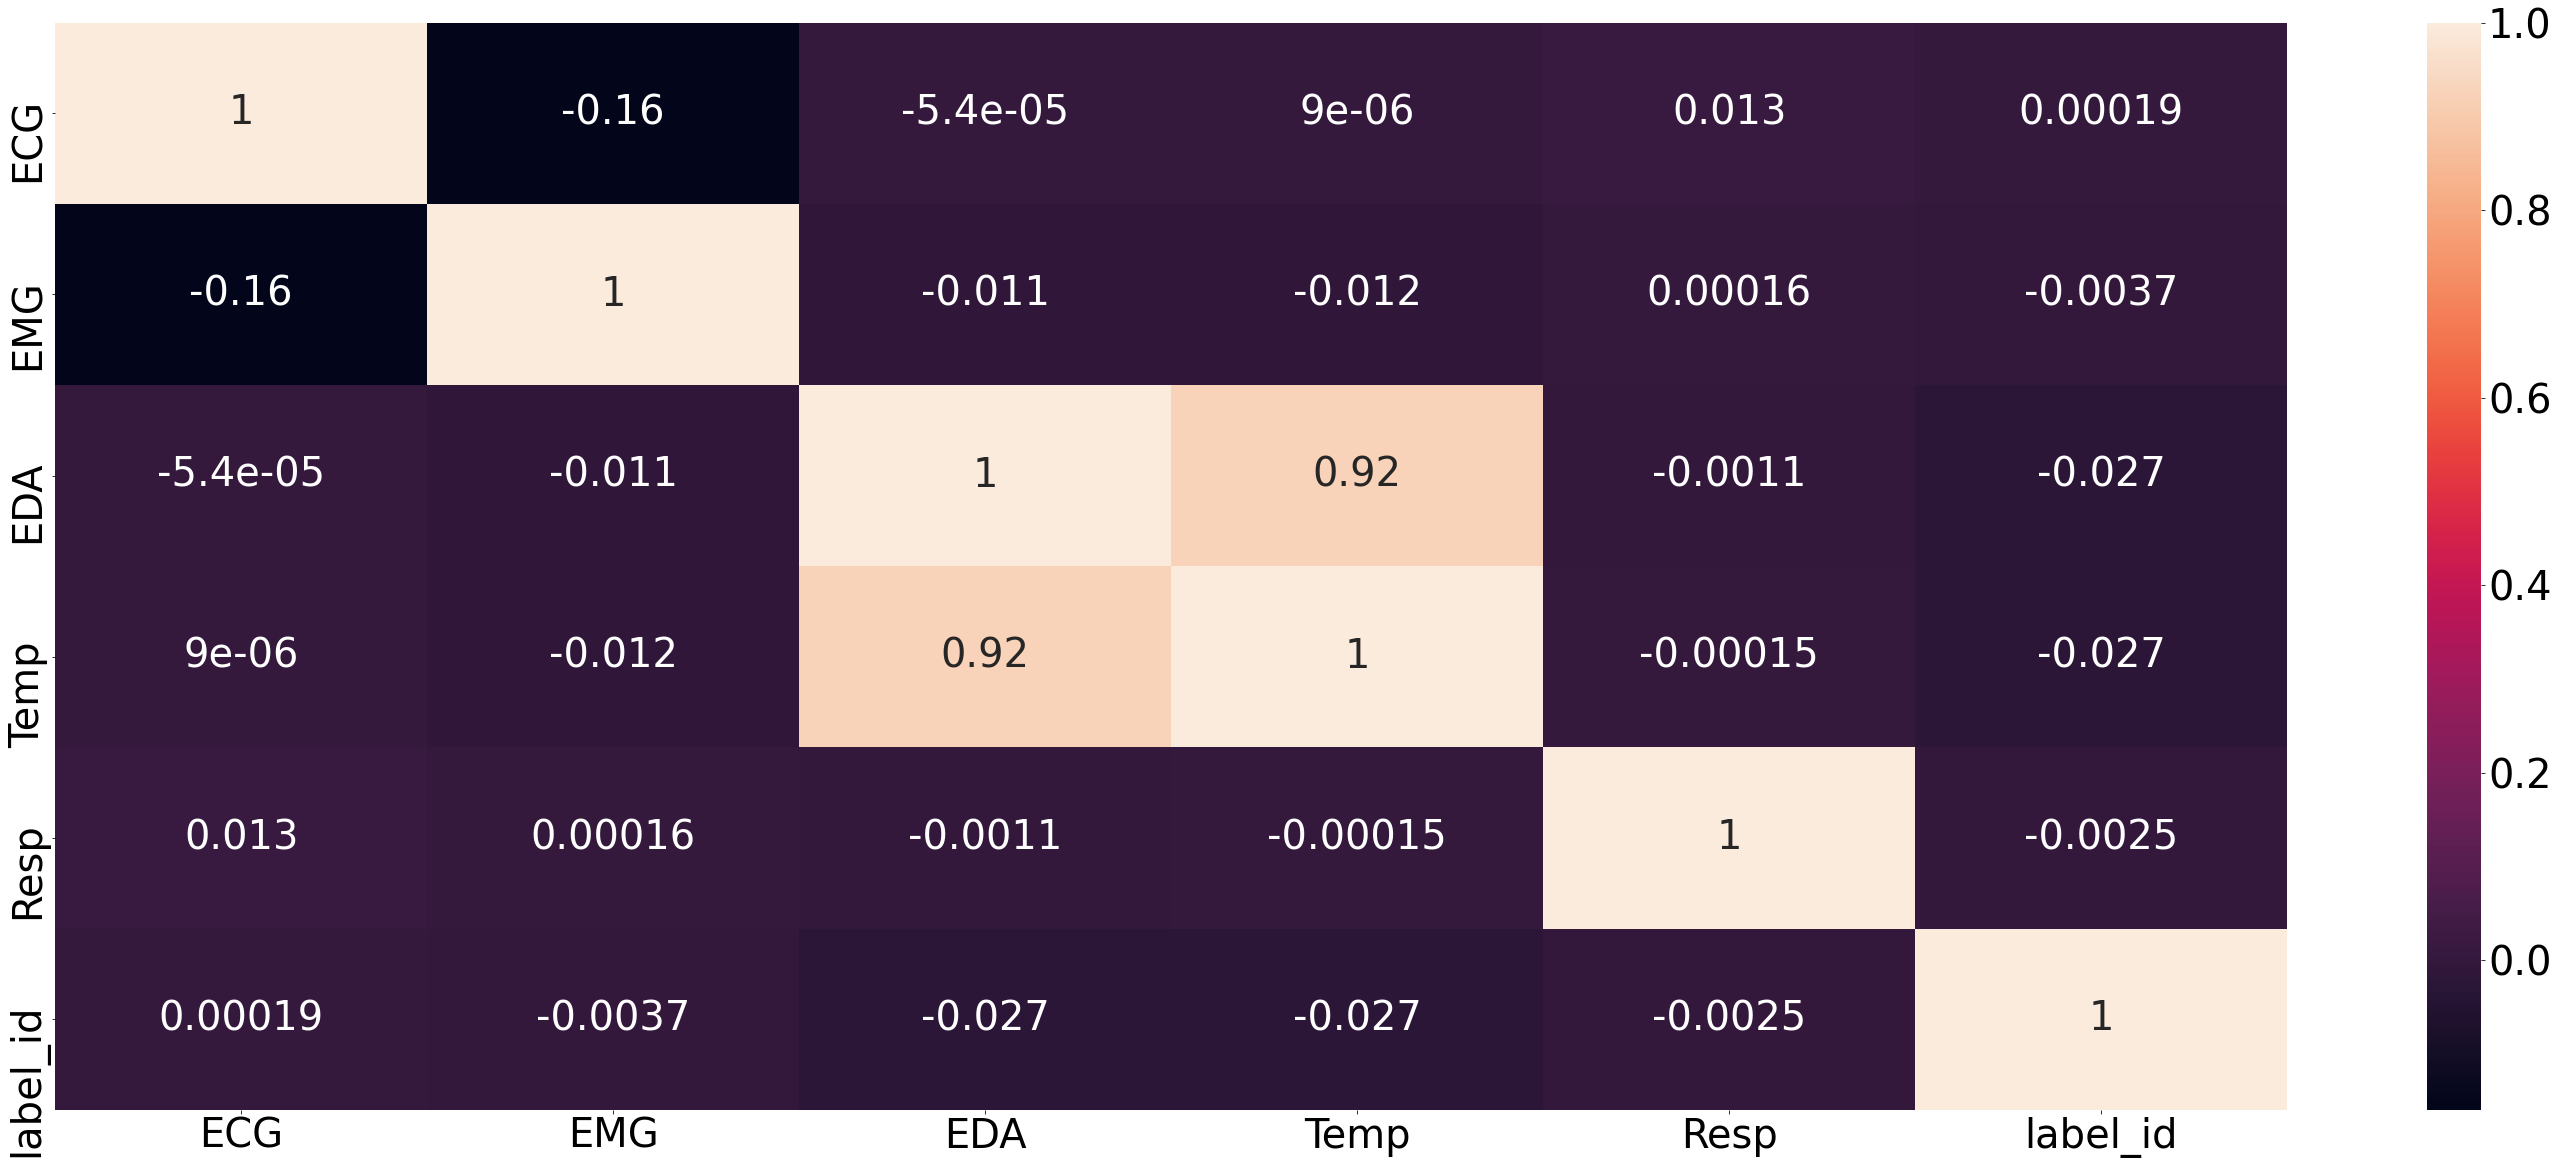

In [59]:
fig,ax_corr = plt.subplots(1, 1, figsize=(50,20))
plt.rcParams.update({'font.size': 40})

sn.heatmap(sample_corr_df, annot=True, ax=ax_corr)

# Cleaning Data

## Rolling Z-Score

In [60]:
from scipy import stats

In [61]:
sample_df["EDA"]

1          0.716019
2          0.714493
3          0.715637
4          0.714874
5          0.715256
             ...   
3847196    1.720810
3847197    1.707077
3847198    1.704407
3847199    1.748276
3847200    1.724625
Name: EDA, Length: 3847200, dtype: float64

In [ ]:
for name in chest_signal_available:
    sample_df[name] = stats.zscore(sa)

## Testing some stuffs

In [62]:
def rolling_z_score(x, window):
    r = x.rolling(window=window)
    m = r.mean()
    s = r.std(ddof=0)
    z = (x-m)/s
    return z[window-1:]

In [63]:
normalized_sample_df = rolling_z_score(sample_df, 100)

In [71]:
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ECG,3847200.0,0.001254,0.149723,-1.460220,-0.038589,0.018127,0.054611,1.478714
EMG,3847200.0,-0.002562,0.010424,-0.159439,-0.008469,-0.001877,0.003616,0.142136
EDA,3847200.0,1.281778,0.455223,0.416183,0.867462,1.001740,1.686859,2.257919
Temp,3847200.0,34.774216,0.479636,33.659485,34.387238,34.612518,35.264801,35.778046
Resp,3847200.0,0.050904,3.450750,-26.930237,-2.049255,-0.228882,2.058411,31.895447
label_id,3847200.0,1.429039,1.631451,0.000000,0.000000,1.000000,2.000000,7.000000


In [72]:
normalized_sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ECG,3847101.0,-5.802372e-02,1.512318,-5.888567,-1.279432,0.123505,0.780655,6.577422
EDA,3847101.0,7.616709e-04,1.006240,-9.572559,-0.758191,-0.219517,0.469255,8.654941
EMG,3847101.0,5.693976e-04,1.007891,-6.549933,-0.628024,0.073695,0.691009,5.592417
Resp,3847101.0,5.201917e-02,1.528347,-9.686989,-1.493115,0.265570,1.590873,5.948399
Temp,3847101.0,9.261062e-04,0.999246,-5.252037,-0.235370,0.271440,0.639136,6.614873
label,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label_id,255988.0,-9.548366e-18,0.161779,-9.949874,0.000000,0.000000,0.000000,9.949874
subject,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

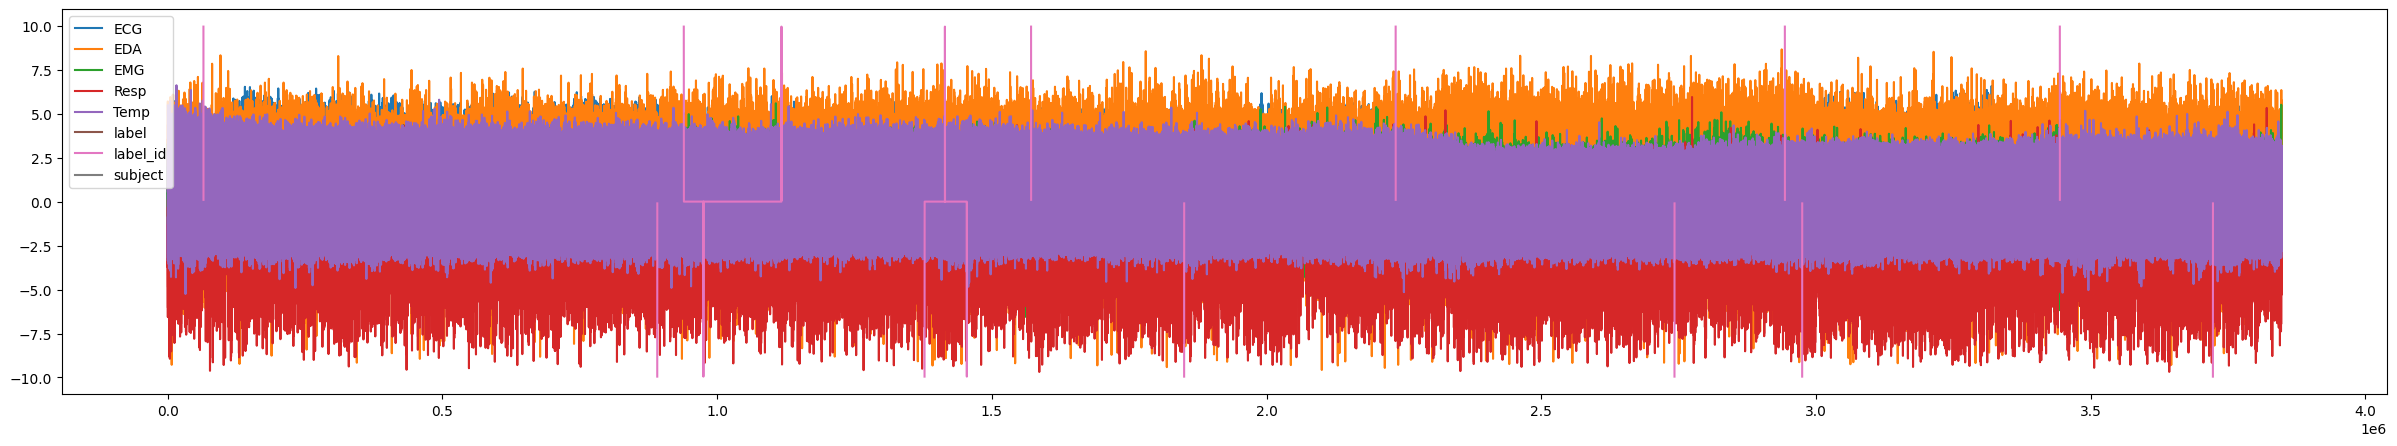

In [74]:
plt.rcdefaults()
normalized_sample_df.plot(figsize=(30, 5))